# exam1 due 5p Fri Feb 5 2020

This assignment was be graded on both participation and correctness (1 point each, for a total of 2 points for each sub-problem).

***Notes regarding regrade requests:***
* I will accept regrade requests until 5p Fri Feb 26.  
* To request a regrade, send me a message using Canvas Conversations with a short explanation of which problem(s) you want regraded, and why you think your solution is equivalent to or equally valid as the one I provided.
* Note that it is possible your score will decrease after the regrade, so please be sure you understand the problem and solution before making a request. To help you understand the problems and their solutions before you submit your request, I am happy to answer questions during class meetings.



14.5 <= scores <= 21.0
median score = 19.0


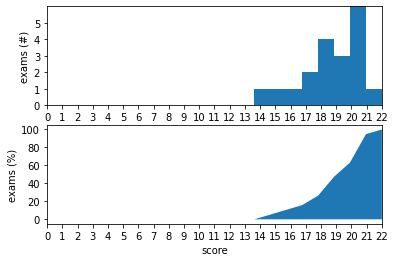

In [ ]:
import numpy as np
import pylab as plt

scores = np.array([14.5 , 15.  , 16.25, 17.  , 17.5 , 18.25, 18.5 , 18.5 , 18.5 ,
                   19.  , 19.  , 19.  , 20.  , 20.  , 20.  , 20.25, 20.5 , 20.5 ,
                   21.  ])

print('%0.1f <= scores <= %0.1f'%(scores.min(),scores.max()))
print('median score = %0.1f'%np.median(scores))

xlim = (0,22)
dxlim = xlim[1] - xlim[0]

plt.figure()
plt.subplot(2,1,1)
h = plt.hist(scores,bins=np.linspace(xlim[0],xlim[1],dxlim))
n,s = h[0],h[1]
N = int(np.ceil(h[0].max()))
plt.ylim(0,N)
plt.xticks(np.linspace(xlim[0],xlim[1],dxlim+1))
plt.yticks(np.arange(0,N))
plt.xlim(xlim)
plt.ylabel('exams (#)');

plt.subplot(2,1,2)
n *= 100./n.sum()
n = np.hstack((0.,n))
plt.fill_between(s,np.cumsum(n),0*n)
plt.xlim(xlim)
plt.xticks(np.linspace(xlim[0],xlim[1],dxlim+1))
plt.yticks(np.linspace(0,100,6))
plt.xlabel('score'); plt.ylabel('exams (%)');

# 0. Sam; he/him

a. Approximately how many hours did you spend on this assignment?

***Answer:*** $\approx$ 2 hours

b. Were there specific problems that took much longer than others?

***Answer:*** n/a

c. What class meeting(s) did you participate in this week?

***Answer:*** All :)

d. What timezone(s) were you working in this week?

***Answer:*** Seattle time


# 1. stability of nonlinear DE

Consider the nonlinear DE (NL)

$$ \dot{x} = -y - x (x^2 + y^2),\ \dot{y} = x - y (x^2 + y^2). $$

a. Linearize (NL) about the equilibrium at the origin; is the linearized system exponentially stable, marginally stable, or unstable?

***Solution:*** computing derivatives and evaluating at the origin is straightforward, but the linearization can be determined by inspection:  neglecting non-linear terms in (NL) yields $\dot{x} \simeq -y,\ \dot{y} \simeq x$ whence

$$A = \left[ \begin{array}{cc} 0 & -1 \\ 1 & 0 \end{array} \right]. $$

Since the eigenvalues of $A$ are pure imaginary $\pm j$, the linearized system is ***marginally stable***.

b. Is the origin asymptotically stable, marginally stable, or unstable in (NL)?  (***Hint:*** use the change-of-variables to *polar coordinates* $x = r \cos\theta$, $y = r\sin\theta$.)

***Solution:*** noting that $x^2 + y^2 = r^2$ we find $x \dot{x} + y \dot{y} = r \dot{r}$; substituting the given expressions for $\dot{x}$ and $\dot{y}$ and simplifying yields $r \dot{r} = -r^4$ so $\dot{r} = -r^3$.  Noting that $\theta = \arctan(y,x)$ we find $\dot{\theta} = (x\dot{y} - y\dot{x})/r^2$; substituting the given expressions for $\dot{x}$ and $\dot{y}$ and simplifying yields $\dot{\theta} = 1$.  Since the rotational and radial dynamics are decoupled, we analyze them separately.  Plotting $\dot{r}$ versus $r$, we note that all trajectories converge monotonically to the origin (the time derivative of $r$ always points toward the origin), so the origin is ***asymptotically stable***.



# 2. linear DE (Markov chain)

Let $X$ be a finite set and $p:X\times X\rightarrow[0,1]\subset\mathbb{R}$ a function that specifies the probability of transitioning between elements of $X$, i.e.

$$ \forall x \in X : \sum_{x'\in X} p(x,x') = 1 $$

where $p(x,x')$ is the probability of transitioning from $x$ to $x'$.  Letting $\rho : X\rightarrow[0,1]$ denote a probability distribution over $X$, define $\rho^+ : X\rightarrow[0,1]$ by

$$ \forall x'\in X : \rho^+(x') = \sum_{x\in X} p(x,x') \rho(x). $$

a. Show that the preceding DE is linear by choosing a basis for the vector space $\mathbb{R}^{|X|}$ and representing each component of $\rho^+$ as a linear combination of the components of $\rho$ in that basis.

***Solution:*** without loss of generality we assume $X = \left\{ 1, \dots, |X| \right\}$.  Choosing the basis $\left\{\varepsilon_j\right\}_{j=1}^{|X|}$ where $\varepsilon_j:X\rightarrow[0,1]$ is defined 

$$ \forall i\in\left\{1,\dots,|X|\right\} : \varepsilon_j(i) = \left\{ \begin{array}{ll} 1, & i = j, \\ 0, & i \neq j, \end{array} \right. $$

and identifying each $\varepsilon_j$ with the $j$-th standard Euclidean basis ***row*** vector $e_j^\top\in\mathbb{R}^{1\times |X|}$,
we find that $\rho^+ = \rho P$ where $P_{ij} = p(i,j)$; this DE is linear.

b. Show that there is always a nonzero equilibrium $\bar{\rho}\neq 0$ of the preceding DE such that $\bar{\rho}^+ = \bar{\rho}$.  (***Hint:*** show that $1$ is an eigenvalue of the matrix determined in (a.).)

***Solution:*** note that the column vector of ones, $\mathbf{1}\in\mathbb{R}^{|X|}$, is an eigenvector of $P$ with eigenvalue $1$ since the rows of $P$ sum to $1$.  Since the set of eigenvalues of $P$ equals the set of eigenvalues of $P^\top$, we conclude $1$ must be an eigenvalue of $P$, i.e. there must exist a nonzero ***row*** vector $\bar{\rho}\neq 0$ such that $\bar{\rho}^+ = \bar{\rho} P = \bar{\rho}$.

# 3. stability of CT-LTI systems

Consider the spring-mass-damper "MCK" (CT-LTI) system

$$ M \ddot{q} + C \dot{q} + K q = u $$

where $M = M^\top > 0$, $C = C^\top > 0$, $K = K^\top > 0$,
and let $P$ be such that $\left[ \begin{array}{cc} q^\top & \dot{q}^\top \end{array} \right] P \left[ \begin{array}{cc} q \\ \dot{q} \end{array} \right] = q^\top K q + \dot{q}^\top M \dot{q}$ (which is the sum of potential and kinetic energy).

a. Try to prove that (CT-LTI) is exponentially stable using the Lyapunov test using the given "$P$" matrix; what property is missing from the "$Q$" matrix?

***Solution:*** the "$P$" matrix is

$$ P = \left[ \begin{array}{cc} K & 0 \\ 0 & M \end{array} \right]. $$

With $x = (q,\dot{q})$ we have

$$ \dot{x} = \left[ \begin{array}{cc} 0 & I \\ -M^{-1} K & -M^{-1} C \end{array} \right] x + \left[ \begin{array}{cc} 0 \\ I \end{array} \right] u = A x + B u, $$

$$ A^\top P + P A = \left[ \begin{array}{cc} 0 & 0 \\ 0 & -2C \end{array} \right] = Q; $$

although $Q$ is symmetric, it is only negative ***semi***definite, so we aren't able to verify the system is exponentially stable using this $P$ and $Q$.

Now consider the ***unstable*** system

$$ M \ddot{q} = C \dot{q} + K q + u. $$

b. Design a state-feedback control law $u(q,\dot{q})$ that stabilizes the closed-loop system.  (***Hint:*** you can use the conclusion of (a.) even if you didn't solve (a.) correctly or completely.)

***Solution:*** we will choose $u$ to (i) cancel the "natural" dynamics and (ii) impose new stable MCK dynamics defined by proportional/derivative controller matrices $K_P = K_P^\top > 0$, $K_D = K_D^\top > 0$:

$$ u = -(C\dot{q} + Kq) - (K_D \dot{q} + K_P q). $$

In particular, choosing $K_D = C$ and $K_P = K$ yields $M\ddot{q} + C\dot{q} + K q = 0$, which we know from (a.) is a stable system.

# 4. controllability of CT-LTV system
Consider the (CT-LTV) system
$$\dot{x} = A(t) x + B(t) u$$
with state transition matrix $\Phi:\mathbb{R}\times\mathbb{R}\rightarrow\mathbb{R}^{n\times n}$.

Given $t_0,t_1\in\mathbb{R}$, let
$$W(t_0,t_1) = \int_{t_0}^{t_1} \Phi(t_1,\tau)B(\tau) B(\tau)^\top\Phi(t_1,\tau)^\top d\tau$$
denote the reachability Gramian.  

Given $\eta_1\in\mathbb{R}^n$, let $x_1 = W(t_0,t_1)\eta_1$ be the state reached by applying input $u_1:[t_0,t_1]\rightarrow\mathbb{R}^k$ defined for all $t\in[t_0,t_1]$ by 
$$u_1(t) = B(t)^\top \Phi(t_1,t)^\top \eta_1$$
to (CT-LTV).

a. Suppose $u_2:[t_0,t_1]\rightarrow\mathbb{R}^k$ is such that
$$x_1 = \int_{t_0}^{t_1} \Phi(t_1,\tau)B(\tau)u_2(\tau)d\tau.$$
What state is reached from the origin by applying input $u_3 = u_1 - u_2$?

***Solution:*** linearity ensures that the state reached at time $t_1$ by applying $u_3 = u_1 - u_2$ from $x(t_0) = 0$ is the difference between the states reached by applying input $u_1$ and $u_2$; since $u_1$ and $u_2$ both reach the same state $x_1$, the state reached by $u_3$ is the origin $0 = x_1 - x_1$.

b. Suppose $W(t_0,t_1)$ is nonsingular and let $x(t_1),x(t_0)\in\mathbb{R}^n$ be given.  Determine an input $\mu:[t_0,t_1]\rightarrow\mathbb{R}^k$ that steers the system from $x(t_0)$ to $x(t_1)$;
express your answer solely in terms of $B$, $\Phi$, $W$, $x(t_1)$, and $x(t_0)$.

***Solution:*** since $W(t_0,t_1)$ is nonsingular, there exists $\eta\in\mathbb{R}^n$ such that $x(t_1) - \Phi(t_1,t_0)x(t_0) = W(t_0,t_1)\eta$.  Using this $\eta$ to define a control input by

$$ \mu(t) = B(t)^\top\Phi(t_1,t)^\top\eta $$

steers the state from $x(t_0)$ to $x(t_1)$ since

$$x(t_1) - \Phi(t_1,t_0)x(t_0) = W(t_0,t_1)\eta = \int_{t_0}^{t_1}\Phi(t_1,\tau)B(\tau)\mu(\tau)d\tau. $$

# 5. numerical methods

We know that the flow of a linear DE depends linearly on the initial state and control input -- in fact, we have a formula demonstrating the linearity in terms of the state transition matrix.

On the other hand, we know that the flow of a ***non***linear DE depends ***non***linearly on initial state and control input -- in fact, we have a practice exam problem that proves this must be the case.

In this problem, you will verify these facts for the linear and nonlinear DT-DE obtained by simulating linear and nonlinear CT-DE.

a. Verify that the flow of the linear DE depends linearly on initial condition and control input,

$$ \phi(t,x+x',u+u') = \phi(t,x,u) + \phi(t,x',u') $$

for all initial states $v,v'$ and control inputs $u,u'$, by running the three numerical simulations suggested by the above equation and plotting both sides of the equation.

b. Verify that the flow of the ***non***linear DE does ***not*** depend linearly on initial condition and control input,

$$ \phi(t,x+x',u+u') \neq \phi(t,x,u) + \phi(t,x',u') $$

for all initial states $v,v'$ and control inputs $u,u'$, by running the three numerical simulations suggested by the above equation and plotting both sides of the equation.

***In both (a.) and (b.), choose (nonzero and unequal) initial conditions and control inputs and use the following models.***

## cruise control model

Force balance on car chassis yields

$$ m \dot{v} = F - F_d $$

where:
* $m$ is mass of car, passengers, and load;
* $v$ is velocity / speed of car;
* $F$ is engine force, which is proportional to control signal $0 \le u \le 1$ that specifies throttle position (that, in turn, specifies fuel injection rate), and varies nonlinearly with engine speed;
* $F_d$ is disturbance force that consists of gravitational force due to road slope, rolling friction on the road, and aerodynamic drag force.

Taken together, we have a nonlinear differential equation that relates control input $u$ to the rate of change in car velocity $v$:

$$ m \dot{v} = \frac{R}{r} u T\left(\frac{R}{r} v \right) - m g \sin\theta - m g C_r \frac{v}{|v|} - \frac{1}{2} \rho C_d A |v| v. $$

Here's a numerical implementation of the model:


In [ ]:
import numpy as np
from scipy import optimize as op

# 2011 Ford Focus SE
m = 1500. # kg
# parameter values from [Astrom & Murray Ch 4.1]
alpha_n = 40
r = 0.5 # m 
R = alpha_n * r
T_m = 190 # Nm
beta = 0.4
omega_m = 420 # rad/sec ~= 4000 RPM
g = 9.8 # m / sec^2
C_r = 0.01
rho = 1.3 # kg / m^3
C_d = 0.32
A = 2.4 # m^2

# reference velocity -- can vary over time
v_r = lambda t : 20. * np.ones_like(t) # m / sec

# road slope -- can vary over time
theta = lambda t : 4 * (np.pi/180) # rad

# engine torque depends on engine (rotational) velocity
def T(omega):
  return T_m * (1 - beta * (omega / omega_m - 1.)**2)

# differential equation satisfied by car velocity:  \dot{v} = f(v,u)
def nonlinear_DE(t,v,u): 
  return (1./m) * ((R/r) * u * T((R/r) * v)         # engine 
                   - m * g * np.sin(theta(t))       # gravity 
                   - m * g * C_r * v / np.abs(v)    # rolling drag
                   - (1./2) * rho * C_d * A * v**2) # aero drag

In [ ]:
def Jacobian(g,y,d=1e-4):
  """
  approximate derivative via finite-central-differences 

  input:
    g - function - g : R^n -> R^m
    y - n array
    (optional)
    d - scalar - finite differences displacement parameter

  output:
    Dg(y) - m x n - approximation of Jacobian of g at y
  """
  # given $g:\mathbb{R}^n\rightarrow\mathbb{R}^m$:
  # $$D_y g(y)e_j \approx \frac{1}{2\delta}(g(y+\delta e_j) - g(y - \delta e_j)),\ \delta\ll 1$$
  e = np.identity(len(y))
  Dyg = []
  for j in range(len(y)):
      Dyg.append((.5/d)*(g(y+d*e[j]) - g(y-d*e[j])))
  return np.array(Dyg).T

def numerical_simulation(f,t,x,t0=0.,dt=1e-4,ut=None,ux=None,utx=None,return_u=False):
  """
  simulate x' = f(t,x,u) 

  input:
    f : T x X x U --> X - vector field
      T - time space (subset of real numbers)
      X - state space (must be vector space)
      U - control input set
    t - scalar - final simulation time
    x - initial condition; element of X

    (optional:)
    t0 - scalar - initial simulation time
    dt - scalar - stepsize parameter
    return_u - bool - whether to return u_

    (only one of:)
    ut : R --> U
    ux : X --> U
    utx : R x X --> U

  output:
    t_ - N array - time trajectory
    x_ - N x X array - state trajectory
    (if return_u:)
    u_ - N x U array - state trajectory
  """
  t_,x_,u_ = [t0],[x],[]
  
  inputs = sum([1 if u is not None else 0 for u in [ut,ux,utx]])
  assert inputs <= 1, "more than one of ut,ux,utx defined"

  if inputs == 0:
    assert not return_u, "no input supplied"
  else:
    if ut is not None:
      u = lambda t,x : ut(t)
    elif ux is not None:
      u = lambda t,x : ux(x)
    elif utx is not None:
      u = lambda t,x : utx(t,x)

  while t_[-1]+dt < t:
    if inputs == 0:
      _t,_x = t_[-1],x_[-1]
      dx = f(t_[-1],x_[-1]) * dt
    else:
      _t,_x,_u = t_[-1],x_[-1],u(t_[-1],x_[-1])
      dx = f(_t,_x,_u) * dt
      u_.append( _u )

    x_.append( _x + dx )
    t_.append( _t + dt )

  if return_u:
    return np.asarray(t_),np.asarray(x_),np.asarray(u_)
  else:
    return np.asarray(t_),np.asarray(x_)

In [ ]:
# initialize at reference velocity
v0 = v_r(0.) # m / sec

# throttle input that makes v0 an equilibrium
u0 = op.root(lambda u : nonlinear_DE(0,v0,u),0.)['x'][0]

# verify (v0,u0) is an equilibrium
assert np.allclose(0,nonlinear_DE(0,v0,u0))

# linearize about the equilibrium
a = Jacobian(lambda v : nonlinear_DE(0,v,u0),[v0])[0,0]
b = Jacobian(lambda u : nonlinear_DE(0,v0,u),[u0])[0,0]

linear_DE = lambda t,v,u : a*v + b*u

In [ ]:
t = 10

v1 = np.random.rand()*10+10
v2 = np.random.rand()*10+20
v3 = v1 + v2

u1 = lambda t : u0+np.sin(t)
u2 = lambda t : u0*np.ones_like(t)
u3 = lambda t : u1(t) + u2(t)


***Solution to (a):***

In [ ]:
DE = linear_DE

t_,v1_ = numerical_simulation(DE,t,v1,ut=u1)
t_,v2_ = numerical_simulation(DE,t,v2,ut=u2)
t_,v3_ = numerical_simulation(DE,t,v3,ut=u3)

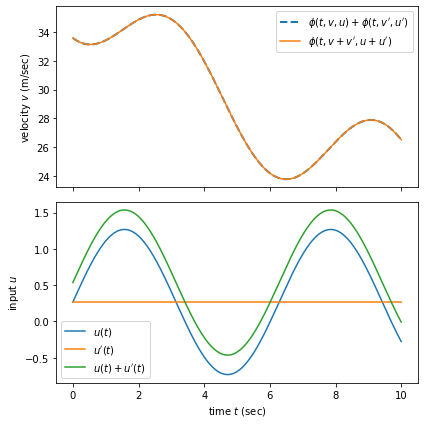

In [ ]:
import pylab as plt

plt.figure(figsize=(6,6))

ax = plt.subplot(2,1,1)
ax.plot(t_,v1_+v2_,'--',lw=2,label=r"$\phi(t,v,u) + \phi(t,v',u')$")
ax.plot(t_,v3_,label=r"$\phi(t,v+v',u+u')$")
ax.set_xticklabels([])
ax.set_ylabel(r'velocity $v$ (m/sec)')
ax.legend()

ax = plt.subplot(2,1,2)
ylim = (0.,1.)
ax.plot(t_,u1(t_),label=r"$u(t)$")
ax.plot(t_,u2(t_),label=r"$u'(t)$")
ax.plot(t_,u1(t_)+u2(t_),label=r"$u(t) + u'(t)$")
ax.set_ylabel(r'input $u$')
ax.legend()

ax.set_xlabel(r'time $t$ (sec)'); 

plt.tight_layout()

***Solution to (b):***

In [ ]:
DE = nonlinear_DE

t_,v1_ = numerical_simulation(DE,t,v1,ut=u1)
t_,v2_ = numerical_simulation(DE,t,v2,ut=u2)
t_,v3_ = numerical_simulation(DE,t,v3,ut=u3)

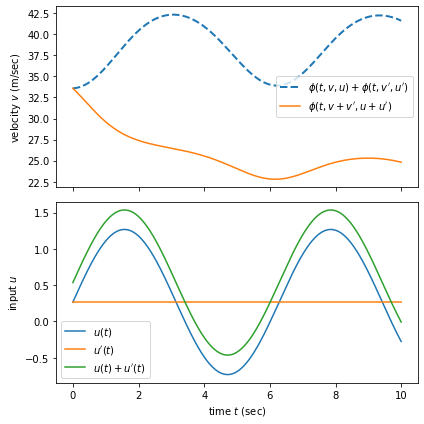

In [ ]:
import pylab as plt

plt.figure(figsize=(6,6))

ax = plt.subplot(2,1,1)
ax.plot(t_,v1_+v2_,'--',lw=2,label=r"$\phi(t,v,u) + \phi(t,v',u')$")
ax.plot(t_,v3_,label=r"$\phi(t,v+v',u+u')$")
ax.set_xticklabels([])
ax.set_ylabel(r'velocity $v$ (m/sec)')
ax.legend()

ax = plt.subplot(2,1,2)
ylim = (0.,1.)
ax.plot(t_,u1(t_),label=r"$u(t)$")
ax.plot(t_,u2(t_),label=r"$u'(t)$")
ax.plot(t_,u1(t_)+u2(t_),label=r"$u(t) + u'(t)$")
ax.set_ylabel(r'input $u$')
ax.legend()

ax.set_xlabel(r'time $t$ (sec)'); 

plt.tight_layout()